<a href="https://colab.research.google.com/github/shafi-21/DataAnalysis/blob/main/Food_Chain_Category_vs_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install pyspark pandas numpy seaborn matplotlib

# Data Preprocessing

In [ ]:
# Import the pandas library
import pandas as pd

# Read the data from the dataset
store_data = pd.read_csv("../Dataset/zomato.csv", dtype='unicode')

In [ ]:
store_data.drop(['url',	'address',	'online_order',	'book_table'	,'phone',	'rest_type'	,'dish_liked',	'approx_cost(for two people)',	'reviews_list',	'menu_item',	'listed_in(type)',	'listed_in(city)'], axis = 'columns', inplace=True)
store_data

,name,rate,votes,location,cuisines
0,Jalsa,4.1/5,775,Banashankari,"North Indian, Mughlai, Chinese"
1,Spice Elephant,4.1/5,787,Banashankari,"Chinese, North Indian, Thai"
2,San Churro Cafe,3.8/5,918,Banashankari,"Cafe, Mexican, Italian"
3,Addhuri Udupi Bhojana,3.7/5,88,Banashankari,"South Indian, North Indian"
4,Grand Village,3.8/5,166,Basavanagudi,"North Indian, Rajasthani"
...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,3.6 /5,27,Whitefield,Continental
51713,Vinod Bar And Restaurant,NaN,0,Whitefield,Finger Food
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,NaN,0,Whitefield,Finger Food
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,4.3 /5,236,"ITPL Main Road, Whitefield",Finger Food


In [ ]:
def is_int(s):
    try:
        return int(s)
    except ValueError:
        return 'NaN'
store_data.votes = store_data.votes.apply(lambda x: is_int(x) )
store_data.votes = store_data.votes.astype(int)

In [ ]:
data = store_data[['name','rate','votes']]
data.head()
frame = data.copy()
frame['rate']=frame['rate'].str.replace('/5','')
# frame[frame.name == 'Paradise Food Court'].iloc[33438]
def is_number(s):
    try:
        return float(s)
    except ValueError:
        return 'NaN'
frame.rate = frame.rate.apply(lambda x: is_number(x) )
frame.dropna(subset = ["name","rate","votes"], inplace=True)

frame.rate = frame.rate.astype(float)
# applying dropna again since some fields were filled with a '-'
frame.dropna(subset = ["rate","votes"], inplace=True)

frame.name = frame.name.astype(str)
frame.votes = frame.votes.astype(int)

In [ ]:
C = frame['rate'].mean()
m = frame["votes"].quantile(0.0)
qframe = frame.copy()

In [ ]:
food_chains = ['Barista Lavazza','Bikanervala','Burgs','Café Coffee Day','Chai Point','Creambell','Darshini','Dosa plaza','Drunken Monkey','Faasos','Goli Vada Pav'
,'Haldiram\'s','Indian Coffee House','Jumbo King','KaatiZone','Karachi Bakery','Monginis','Nirula\'s','Natural Ice Cream','Pizza Corner','Ratna Cafe'
,'Saravana Bhavan','Smokin\' Joe\'s','Wow! Momo','Pramod Laddu Bhandar','The Chocolate Room','Au Bon Pain','Auntie Anne\'s','Baskin-Robbins','Burger King'
,'Carl\'s Jr.','Chili\'s','Cinnabon','Costa Coffee','Domino\'s Pizza','Dunkin\' Donuts','Johnny Rockets','KFC','Krispy Kreme','McDonald\'s','Nando\'s'
,'Papa John\'s Pizza','Pita Pit','Pizza Hut','PizzaExpress','Quiznos','Sal\'s Pizza','Sbarro','Starbucks Coffee','Subway','Taco Bell','Wendy\'s'
,'Wetzel\'s Pretzels','Casual dining','Adyar Ananda Bhavan','Anjappar Chettinad Restaurant','California Pizza Kitchen','Dindigul Thalappakatti Restaurant'
,'Hard Rock Cafe','Moshe\'s','Moti Mahal Delux','Paradise Food Court','Ruby Tuesday']

In [ ]:
food_chain_df = qframe[qframe.name.isin(food_chains)].copy()
food_chain_df.name = food_chain_df.name.astype(str)
food_chain_df.name = food_chain_df.name.apply(lambda x: 'FC - ' + x)

In [ ]:
non_food_chain_list = qframe[~qframe.name.isin(food_chains)].name.tolist()
non_food_chain_df = qframe[qframe.name.isin(non_food_chain_list)].copy()
non_food_chain_df.name = non_food_chain_df.name.astype(str)
non_food_chain_df.name = non_food_chain_df.name.apply(lambda x: 'Non FC - ' + x )

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['votes']
    R = x['rate']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
food_chain_df['score'] = food_chain_df.apply(weighted_rating, axis=1)
non_food_chain_df['score'] = non_food_chain_df.apply(weighted_rating, axis=1)

In [ ]:
food_chain_df = food_chain_df.sort_values('score', ascending=False)

In [ ]:
top_n_list = non_food_chain_df.groupby('name', as_index=False).mean().sort_values('score', ascending=False).head(25).name.tolist()
non_food_chain_df = non_food_chain_df[non_food_chain_df.name.isin(top_n_list)].copy()

In [ ]:
concat_frame = pd.concat([food_chain_df, non_food_chain_df], axis=0)

# Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'FC - Natural Ice Cream'),
  Text(1, 0, 'FC - Hard Rock Cafe'),
  Text(2, 0, 'FC - Drunken Monkey'),
  Text(3, 0, "FC - Nando's"),
  Text(4, 0, 'FC - Chai Point'),
  Text(5, 0, 'FC - Krispy Kreme'),
  Text(6, 0, 'FC - Taco Bell'),
  Text(7, 0, 'FC - Faasos'),
  Text(8, 0, "FC - Dunkin' Donuts"),
  Text(9, 0, 'FC - Karachi Bakery'),
  Text(10, 0, 'FC - Burger King'),
  Text(11, 0, "FC - Domino's Pizza"),
  Text(12, 0, "FC - McDonald's"),
  Text(13, 0, 'FC - Subway'),
  Text(14, 0, 'FC - Costa Coffee'),
  Text(15, 0, 'FC - Indian Coffee House'),
  Text(16, 0, 'FC - KFC'),
  Text(17, 0, 'FC - Moti Mahal Delux'),
  Text(18, 0, 'FC - Pita Pit'),
  Text(19, 0, 'FC - Pizza Hut'),
  Text(20, 0, "FC - Auntie Anne's"),
  Text(21, 0, 'FC - Cinnabon'),
  Text(22,

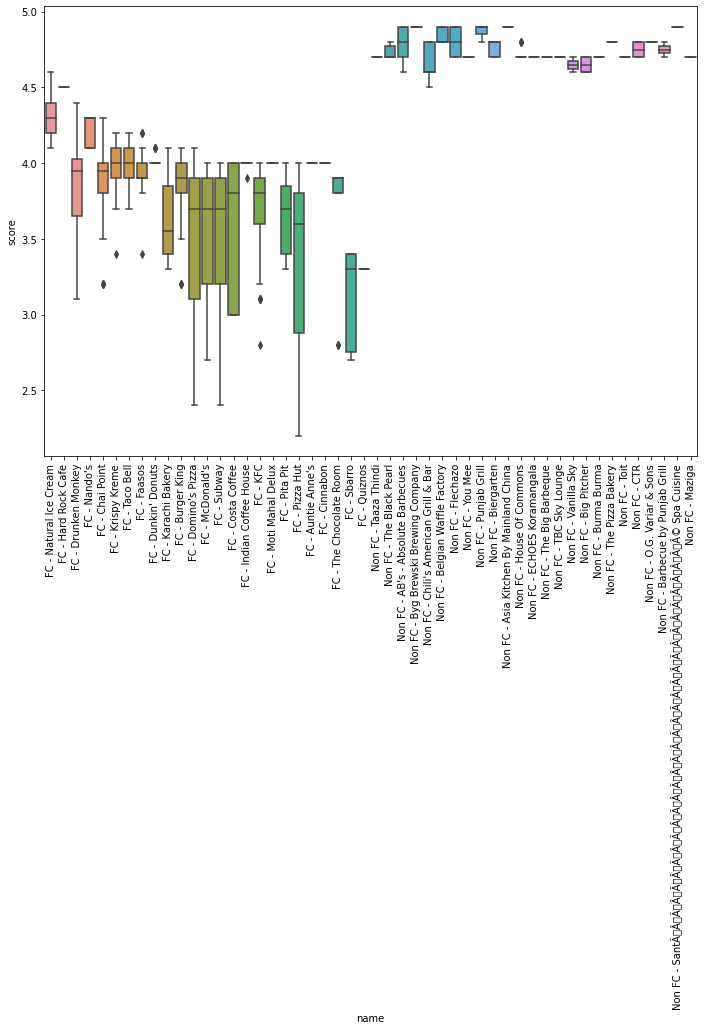

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.boxplot(x="name", y="score", data=concat_frame,ax=ax)
plt.xticks(rotation=90)